__Random Monkey Stock Picker__

In [1]:
# load a list of all S&P 500 companies
import pandas as pd

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = df[0]
df = df[['Symbol', 'Security', 'GICS Sector']]
df['Ticker'] = df['Symbol']
df['Company'] = df['Security']
df = df[['Ticker', 'Company', 'GICS Sector']]
df.head()

,Ticker,Company,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


Generate a random stock picker

In [3]:
import pandas as pd
import numpy as np

stock_data = pd.read_csv('SP500_stock_prices.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data[stock_data['Date'] >= '2019-10-01']
stock_data = stock_data[stock_data['Date'] <= '2020-04-02']
stock_data = stock_data[['Date', 'Ticker', 'Close']]
# Make Date the index
stock_data = stock_data.set_index('Date')

# Calculate returns over 63 business days
# select only the ticker index
indiviual_datas = []

for ticker in stock_data['Ticker'].unique():
    #data_ticker = data.xs(0, level=1).copy()
    data_ticker = stock_data[stock_data['Ticker'] == ticker].copy()
    # make target column
    data_ticker['63-day Price Movement'] = data_ticker['Close'].pct_change(63).shift(-63)
    data_ticker.dropna(inplace=True)
    data_ticker

    indiviual_datas.append(data_ticker)

data_all_tickers = pd.concat(indiviual_datas)
data_all_tickers

,Ticker,Close,63-day Price Movement
Date,,,
2019-10-01,MMM,158.380005,0.113903
2019-10-02,MMM,155.649994,0.156441
2019-10-03,MMM,155.229996,0.149584
2019-10-04,MMM,155.820007,0.146323
2019-10-07,MMM,153.520004,0.158807
...,...,...,...
2019-12-24,ZTS,132.919998,-0.112925
2019-12-26,ZTS,133.029999,-0.159814
2019-12-27,ZTS,133.250000,-0.124353


In [8]:

# Set a seed for reproducibility
np.random.seed(1)
# Make a new Dataframe for the random portfolio returns
random_portfolio_returns = pd.DataFrame(columns=['Random Monkey - 3 Month Return (%)'])
# select 10 random tickers from the list for each date
for date in data_all_tickers.index.unique():
    random_stocks = np.random.choice(data_all_tickers['Ticker'].unique(), size=10, replace=False)
    print(random_stocks)
    # calculate the 63 day returns of the randomly selected stocks
    random_returns = data_all_tickers[data_all_tickers['Ticker'].isin(random_stocks)]['63-day Price Movement'].loc[date]

    # calculate the mean return of the random portfolio (equal weights)
    random_portfolio_return = random_returns.mean()
    # Make a new Dataframe for the random portfolio returns
    random_portfolio_returns.loc[date] = round(random_portfolio_return*100,1)

['PNW' 'INVH' 'RHI' 'NOC' 'SNPS' 'ILMN' 'NVDA' 'HAS' 'EW' 'EBAY']
['NWSA' 'HWM' 'FOXA' 'HLT' 'HII' 'MRNA' 'MGM' 'NTAP' 'AWK' 'CSX']
['UNH' 'IVZ' 'TFX' 'STLD' 'SBUX' 'ITW' 'O' 'FDS' 'LW' 'NSC']
['ABT' 'AAP' 'GOOG' 'C' 'WST' 'WMT' 'GNRC' 'AVY' 'SPG' 'GILD']
['ROP' 'PODD' 'NOW' 'PEG' 'ALGN' 'BRO' 'ARE' 'TRV' 'META' 'LH']
['AEE' 'EXR' 'DHI' 'CSCO' 'GM' 'AFL' 'SNA' 'HCA' 'WBA' 'LHX']
['EXPD' 'ANET' 'IVZ' 'DOV' 'TMO' 'EIX' 'WAT' 'EL' 'CCL' 'AVGO']
['BAC' 'TER' 'META' 'TFX' 'LVS' 'J' 'ES' 'PKG' 'AVB' 'ULTA']
['REG' 'KMI' 'HWM' 'AIG' 'MKTX' 'ED' 'ALB' 'TXT' 'AON' 'TT']
['SYF' 'EQIX' 'ZTS' 'ZBRA' 'LMT' 'HSY' 'TEL' 'BAC' 'AMT' 'VZ']
['VLO' 'PYPL' 'LKQ' 'EXC' 'OXY' 'FDS' 'MAR' 'SPG' 'PGR' 'CE']
['WHR' 'MOS' 'HIG' 'ETR' 'BMY' 'WEC' 'DRI' 'HCA' 'WAT' 'EXPD']
['CBRE' 'RVTY' 'MPC' 'FMC' 'EA' 'DVN' 'CBOE' 'CHTR' 'WM' 'ROL']
['ON' 'TER' 'RJF' 'O' 'UAL' 'VZ' 'CHD' 'PGR' 'TFC' 'COO']
['SPGI' 'RSG' 'HES' 'APTV' 'BG' 'VICI' 'DD' 'WELL' 'BXP' 'TPR']
['HD' 'RSG' 'NCLH' 'KR' 'MOH' 'UHS' 'YUM' 'ALGN' 'SNA' 'ZI

In [9]:
random_portfolio_returns
# save as a csv
random_portfolio_returns.to_csv('random_monkey_portfolio_returns.csv')

In [12]:
random_portfolio_returns

,Random Monkey - 3 Month Return (%)
2019-10-01,4.6
2019-10-02,19.1
2019-10-03,14.4
2019-10-04,9.0
2019-10-07,9.8
...,...
2019-12-24,-23.7
2019-12-26,-26.8
2019-12-27,-18.4
2019-12-30,-36.5


In [11]:
# print average
print(random_portfolio_returns.mean())

Random Monkey - 3 Month Return (%)   -2.98125
dtype: float64


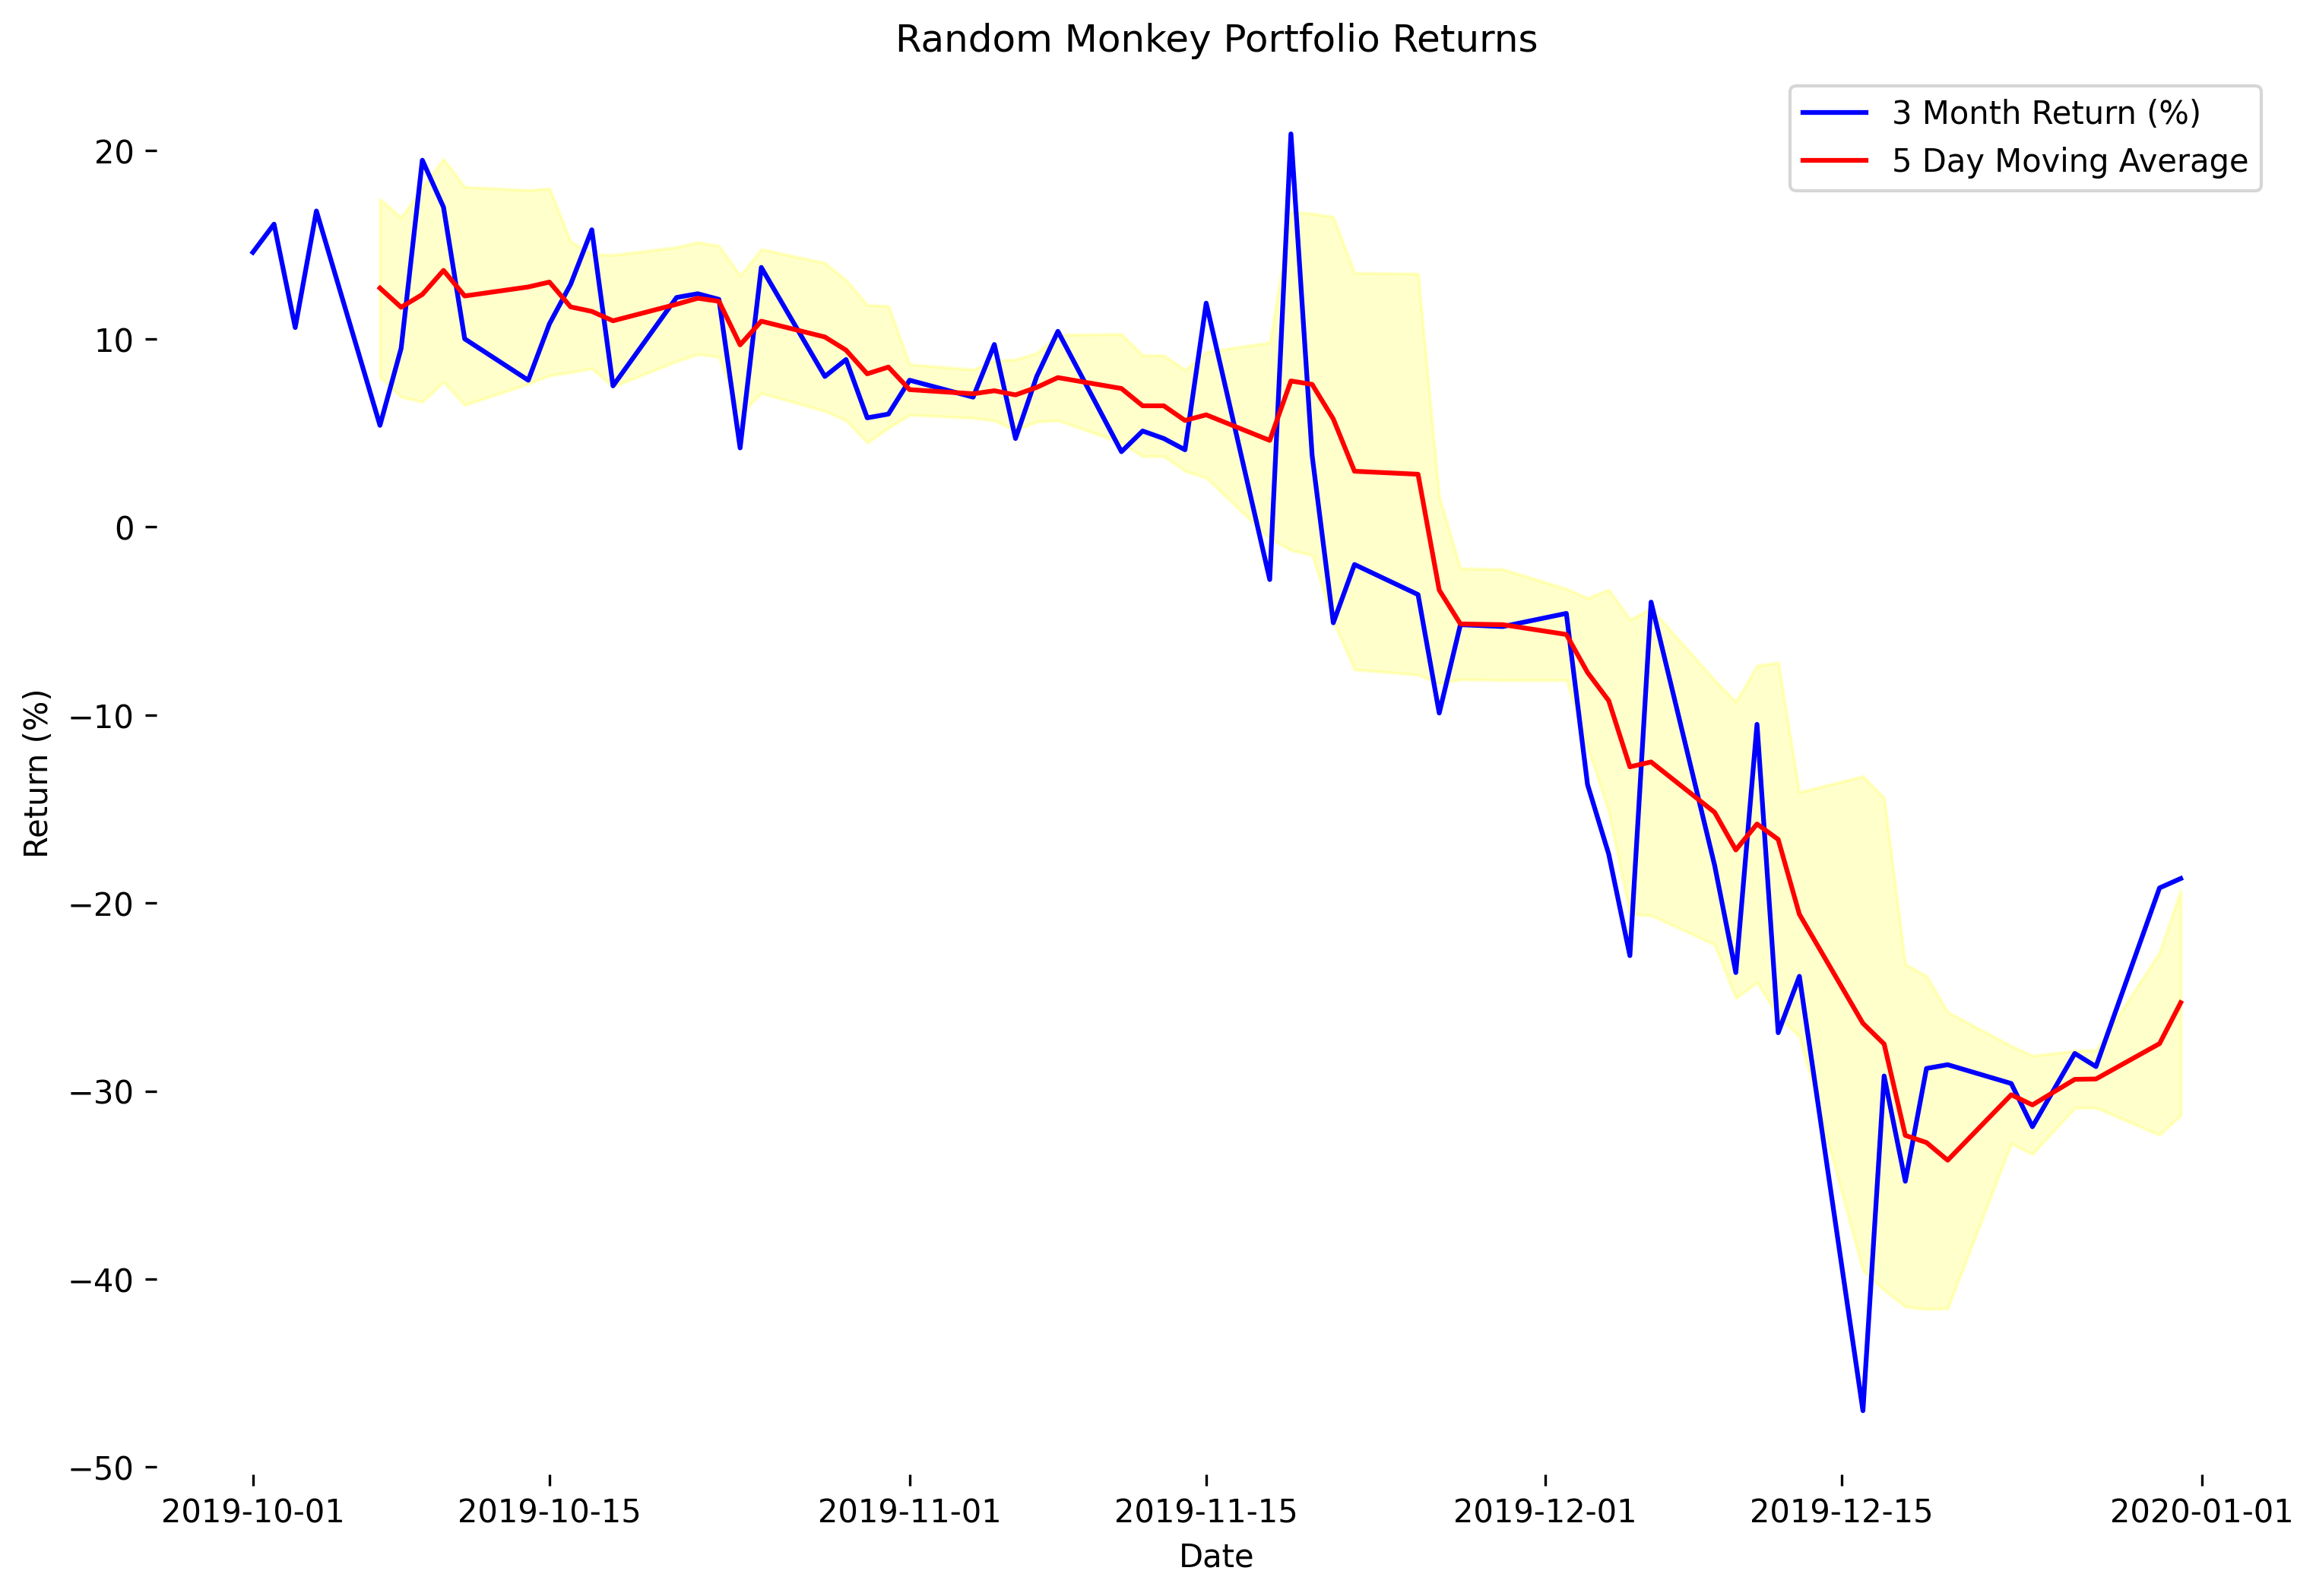

In [6]:
# plot the portfolio returns
import matplotlib.pyplot as plt
# Calculate moving averages and moving variance
moving_average = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].rolling(window=5).mean()
moving_variance = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].rolling(window=5).std()

# Plot the portfolio returns
plt.figure(figsize=(12,8), facecolor='white', dpi=300)
# remove the grid
plt.grid(False)
# box around plot area white
plt.box(False)
plt.plot(random_portfolio_returns.index, random_portfolio_returns['Random Monkey - 3 Month Return (%)'], label='3 Month Return (%)', color='b')
plt.plot(moving_average.index, moving_average, label='5 Day Moving Average', color='r')
# plot rolling confidence interval as a yellow box
plt.fill_between(moving_variance.index, moving_average-moving_variance, moving_average+moving_variance, color='yellow', alpha=0.2)
plt.title('Random Monkey Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()


In [10]:
# max return
max_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].max()
# min return
min_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].min()
date_max = random_portfolio_returns[random_portfolio_returns['Random Monkey - 3 Month Return (%)'] == max_return].index[0]
date_min = random_portfolio_returns[random_portfolio_returns['Random Monkey - 3 Month Return (%)'] == min_return].index[0]
print(f'max return: {max_return} for date:{date_max}')
print(f'min return: {min_return} for date:{date_min}')

max return: 20.9 for date:2019-11-19 00:00:00
min return: -45.4 for date:2019-12-16 00:00:00


In [11]:
# average return
average_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].mean()
# standard deviation of returns
std_return = random_portfolio_returns['Random Monkey - 3 Month Return (%)'].std()
print(f'average return: {average_return}')
print(f'standard deviation of returns: {std_return}')

average return: -2.4484375
standard deviation of returns: 16.650840030170176


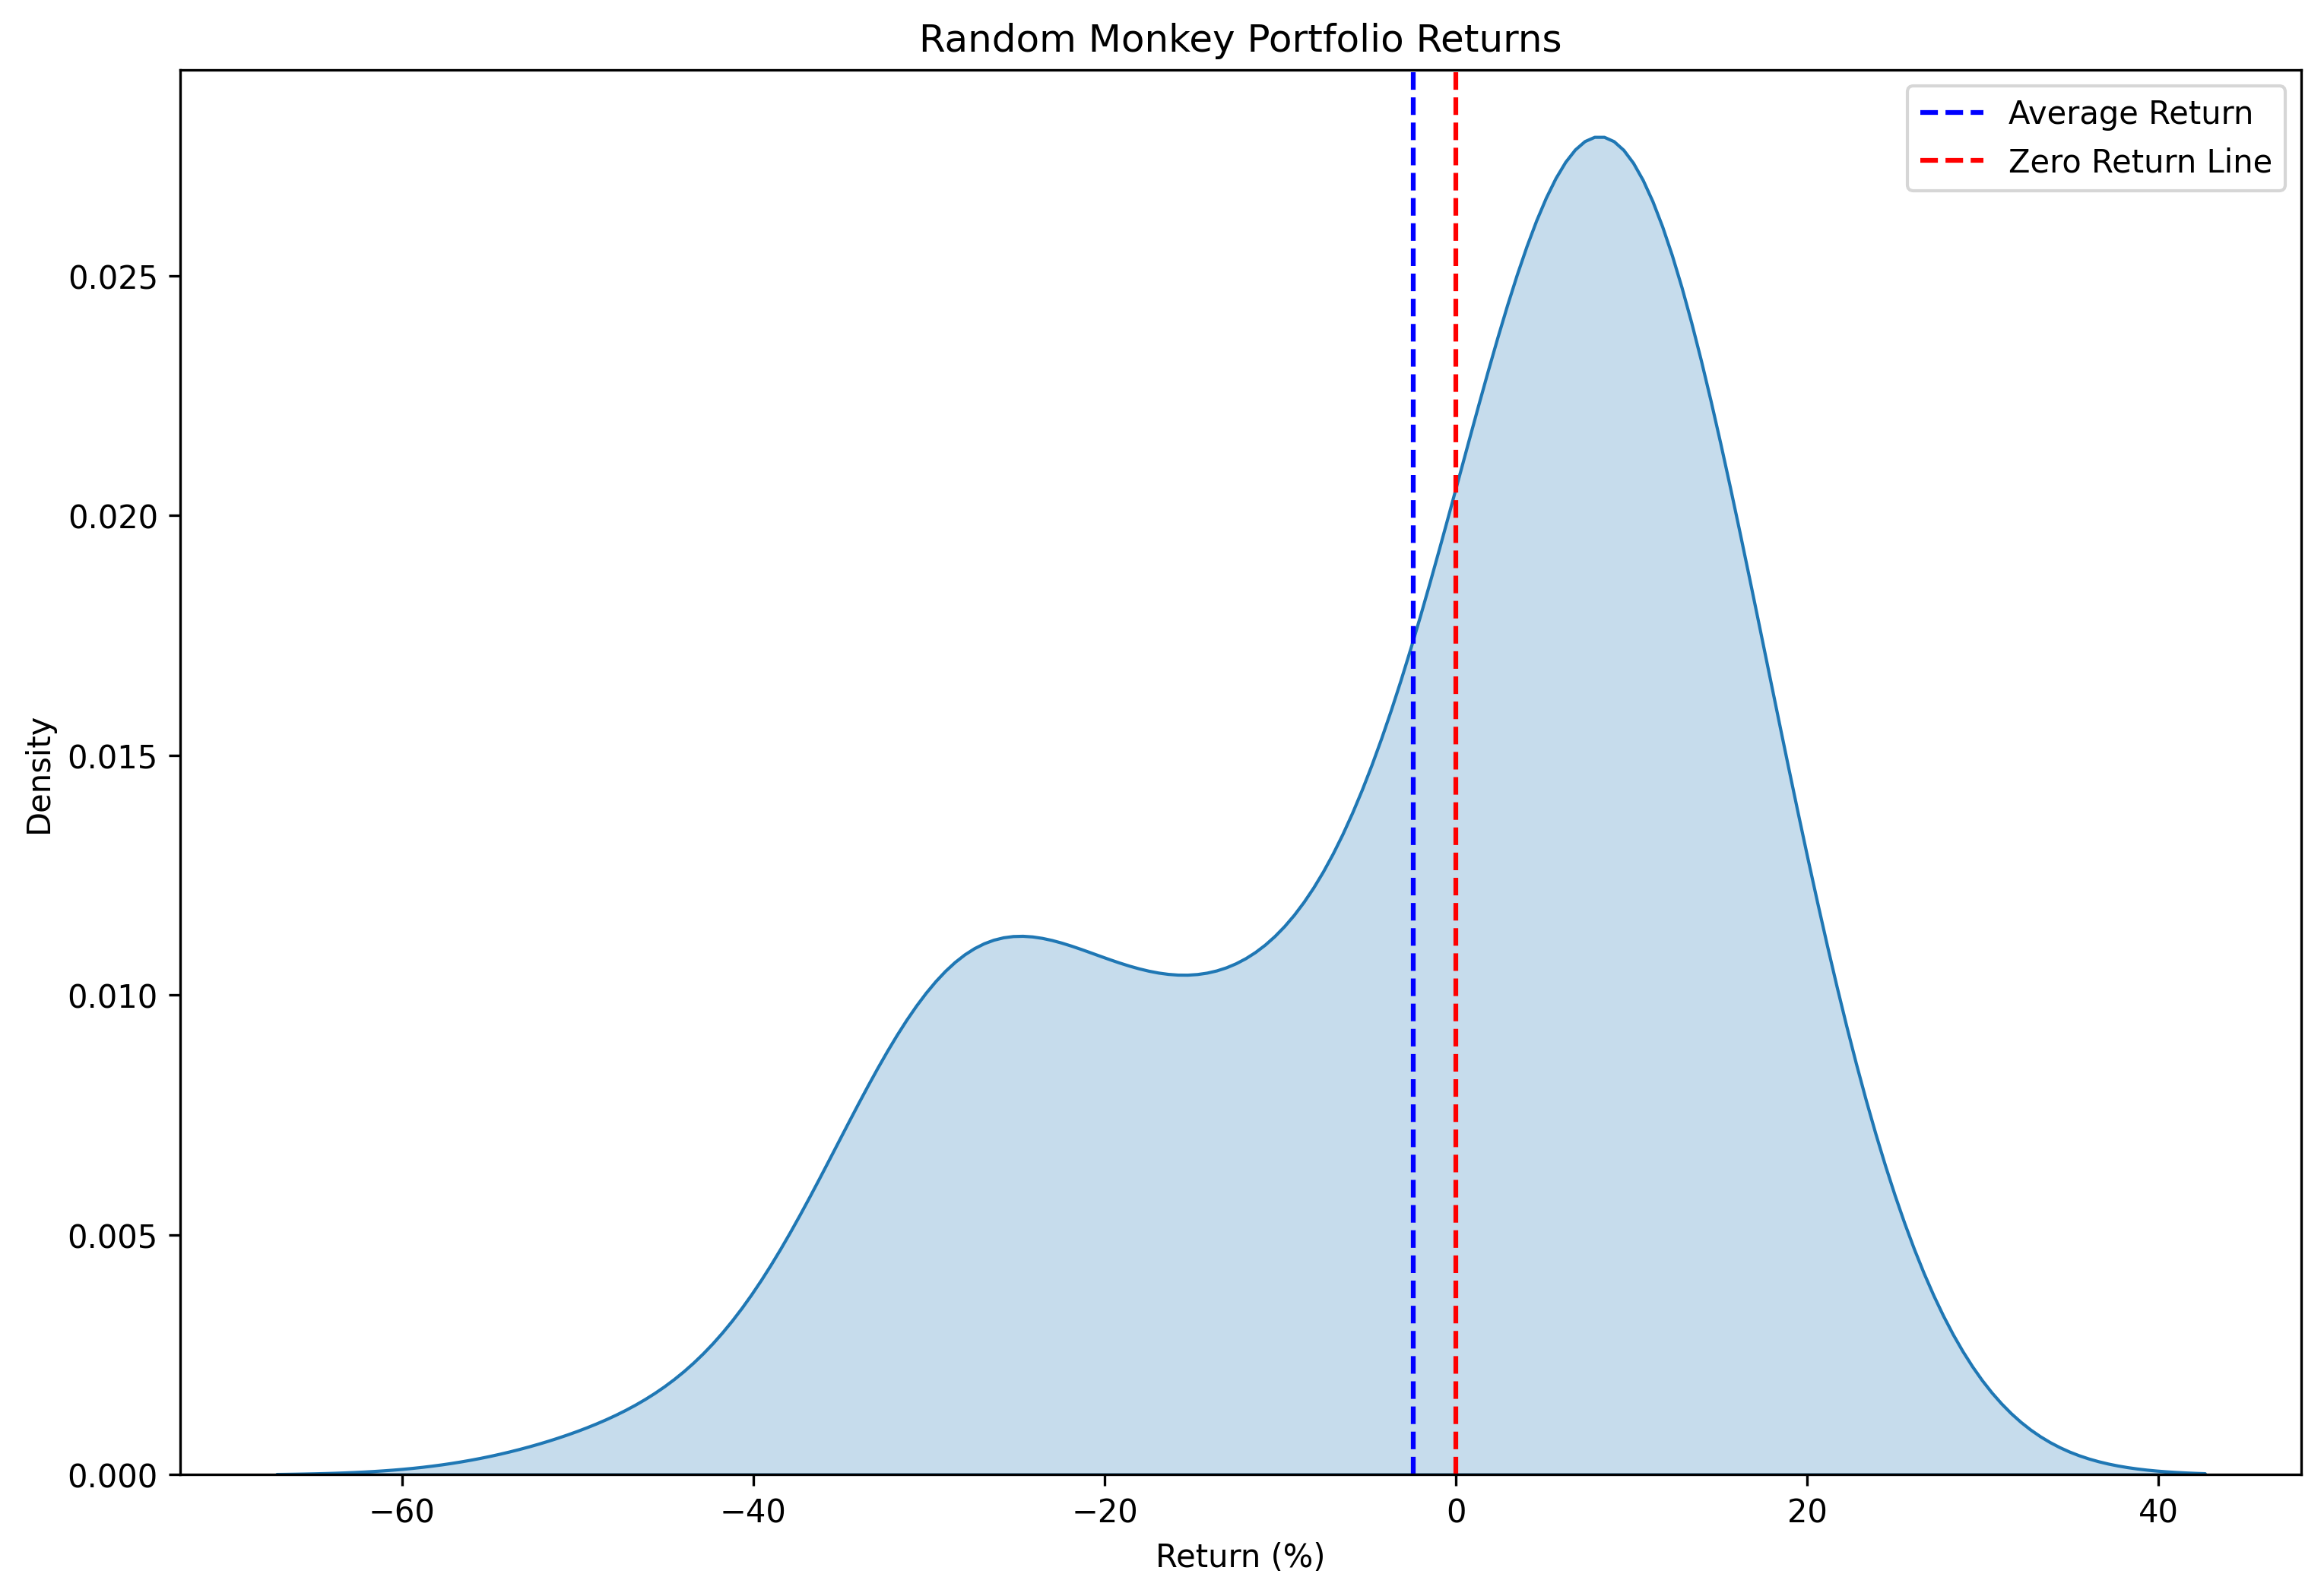

In [16]:
# density plot of the portfolio retuns
import seaborn as sns
plt.figure(figsize=(12,8), facecolor='white', dpi=300)
sns.kdeplot(random_portfolio_returns['Random Monkey - 3 Month Return (%)'], fill=True)
# make a vertical line for the average return and for the zero return
plt.axvline(average_return, color='b', linestyle='--', label='Average Return')
plt.axvline(0, color='r', linestyle='--', label='Zero Return Line')
plt.legend()
plt.title('Random Monkey Portfolio Returns')
plt.xlabel('Return (%)')
plt.ylabel('Density')
plt.show()
